## Configurações iniciais:


*   Import das bibliotecas
*   Load dos datasets



In [ ]:
# Importando as bibliotecas necessarias:

# Bibliotecas basicas:
import pandas as pd
import numpy as np
import seaborn as sns

# Feature Engineering:
from sklearn.preprocessing import PolynomialFeatures

# Data Cleaning:
from sklearn.preprocessing import MinMaxScaler

# Validation:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV

# Models:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from mlxtend.ensemble import StackingRegressor
from sklearn.svm import SVR

ModuleNotFoundError: ignored

In [ ]:
# Carregando os datasets do desafio:
URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

In [ ]:
# Criando dataframes para X e Y de treino e teste:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features]
Y_treino = dados_treino[coluna_label]
X_teste = dados_teste[coluna_features]
Y_teste = dados_teste[coluna_label]

## Feature Engineering:


*   Dummy Variable informando se nota da prova CH foi zero ou não
*   Média Aritmética
*   Média Ponderada
*   Features Polinomiais





In [ ]:
# Criando dummy variable informando se a nota da prova CH (NU_NOTA_CH) foi zero ou nao:
X_treino['NU_NOTA_CH_0'] = (X_treino['NU_NOTA_CH']==0.0).astype(int)
X_teste['NU_NOTA_CH_0'] = (X_teste['NU_NOTA_CH']==0.0).astype(int)

In [ ]:
# Criando media aritmetica:
X_treino['Media_Notas'] = X_treino.mean(axis=1)
X_teste['Media_Notas'] = X_teste.mean(axis=1)

In [ ]:
# Criando media ponderada:
pesos = [dados_treino[[x,'NU_NOTA_LC']].corr()[x][1] for x in coluna_features]

X_treino['MediaPonderada'] = (X_treino['NU_NOTA_CN'] * pesos[0] + X_treino['NU_NOTA_CH'] * pesos[1] + X_treino['NU_NOTA_MT'] * pesos[2] + X_treino['NU_NOTA_REDACAO'] * pesos[3] )/ sum(pesos)
X_teste['MediaPonderada'] = (X_teste['NU_NOTA_CN'] * pesos[0] + X_teste['NU_NOTA_CH'] * pesos[1] + X_teste['NU_NOTA_MT'] * pesos[2] + X_teste['NU_NOTA_REDACAO'] * pesos[3] )/ sum(pesos)


In [ ]:
# Criando fetaures polinomiais:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_treino_poly = poly.fit_transform(X_treino)
X_teste_poly = poly.fit_transform(X_teste)

X_treino_poly = pd.DataFrame(X_treino_poly, columns=poly.get_feature_names())
X_teste_poly = pd.DataFrame(X_teste_poly, columns=poly.get_feature_names())

In [ ]:
# Normalizando os dados para reduzir custo computacional:
scaler = MinMaxScaler()
X_treino_norm = scaler.fit_transform(X_treino_poly)
X_treino_norm = pd.DataFrame(X_treino_norm, columns= X_treino_poly.columns)

X_teste_norm = scaler.transform(X_teste_poly)
X_teste_norm = pd.DataFrame(X_teste_norm, columns= X_teste_poly.columns)

## Criando modelos de Regressão:

*   LinearRegression
*   Lasso
*   Ridge
*   GradientBoostingRegressor
*   MLPRegressor



In [ ]:
# LinearRegression:
LR = LinearRegression()
LR.fit(X_treino_norm, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Lasso:
Lass = Lasso(random_state=42)
Lass.fit(X_treino_norm, Y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84331.2552074194, tolerance: 78594.09957215984
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# Ridge:
Ridg = Ridge(random_state=42)
Ridg.fit(X_treino_norm, Y_treino)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

In [ ]:
# GradientBoostingRegressor:
GBR = GradientBoostingRegressor(random_state=42, verbose=True, max_depth=5, n_estimators=100)
GBR.fit(X_treino_norm, Y_treino)

In [ ]:
# MLPRegressor:
NN = MLPRegressor(hidden_layer_sizes=((10,10,10,10)), verbose=True, solver='adam')
NN.fit(X_treino_norm, Y_treino)

In [ ]:
# DecisionTreeRegressor:
DT = DecisionTreeRegressor(random_state=42, max_depth=20, min_samples_leaf=10, min_samples_split=5)
DT.fit(X_treino_norm, Y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
# SVR:
SV = SVR(kernel='linear', verbose=True)
SV.fit(X_treino_norm, Y_treino)

[LibSVM]

In [ ]:
# RandomForestRegressor
RF = RandomForestRegressor(random_state=42, n_estimators=100, criterion='mae', max_depth=20, min_samples_leaf=5)
RF.fit(X_treino_norm, Y_treino)

In [ ]:
# XGBRegressor
XGB = XGBRegressor(random_state=42, seed=42, learning_rate= 0.1, max_depth= 5, n_estimators= 170
                    , booster='gbtree', objective='reg:squarederror')
XGB.fit(X_treino_norm, Y_treino)

In [ ]:
Stack = StackingRegressor(estimators=() )

In [ ]:
# Juntando todos os modelos com o StackingCVRegressor:



ABR = AdaBoostRegressor(learning_rate=0.5, loss='exponential', n_estimators=50)


ETR = ExtraTreesRegressor(random_state=42, criterion='mse', max_depth=9, min_samples_leaf=5
                            ,min_samples_split=10, n_estimators=170, verbose=True)

BR = BaggingRegressor(random_state=42, bootstrap=True, n_estimators=1000, verbose=True)

SV = SVR(kernel='linear', verbose=True)

Elastic = ElasticNet(max_iter=1e7)

In [ ]:
modelos = [GBR, LR, Lass, Ridg, NN, DT, SV]

In [ ]:
row_list = []

for modelo in modelos:

    #modelo_score = cross_val_score(estimator=modelo, X=X_treino_poly, y=Y_treino, cv=5, scoring='neg_mean_squared_error')

    prediction_treino = modelo.predict(X_treino_norm)
    prediction_teste = modelo.predict(X_teste_norm)

    nome_modelo = str(modelo).split('(')[0]
    mse_treino = mean_squared_error(prediction_treino, Y_treino)
    mse_teste = mean_squared_error(prediction_teste, Y_teste)

    row_list.append([nome_modelo, mse_treino, mse_teste])

validacao_modelos = pd.DataFrame(row_list, columns=['Modelo','MSE Treino','MSE Teste'])

validacao_modelos.sort_values('MSE Teste', ascending=True)

,Modelo,MSE Treino,MSE Teste
0,GradientBoostingRegressor,1930.709344,2058.907533
1,LinearRegression,2045.727270,2080.466552
3,Ridge,2050.838326,2085.591786
4,MLPRegressor,2087.778783,2127.386387
2,Lasso,2240.186916,2267.641215


In [ ]:
def testarHiperparametros(modelo, hyperparams, score, cv, train_X, train_y):

    print('Início do teste dos hiperparâmetros: ', dt.datetime.now().strftime(formatoData))

    # Criando um GridSearch
    gridsearch = GridSearchCV(estimator=modelo
                              ,param_grid=hyperparams
                              ,scoring=score # ['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2']
                              ,cv=cv # StratifiedKFold(n_splits=5, shuffle=True)
                              ,return_train_score=False
                              ,n_jobs=-2
                              ,refit=False # se True, ja treina o modelo
                              ,verbose=False #10
                             )
    gridsearch.fit(train_X, train_y)

    print("CV Results: " + str(gridsearch.cv_results_['mean_test_score']))
    print("Best score: " + str(gridsearch.best_score_))
    print("Best params: " + str(gridsearch.best_params_))

In [ ]:
    #validacao = pd.DataFrame([nome_modelo, mse_treino, mse_teste])
    #validacao_modelos.append(validacao, ignore_index=True)
    #validacao_modelos = pd.concat(validacao_modelos, validacao)


    #print( 'Modelo: {}'.format(nome_modelo) )
    #print( 'MSE Treino: {}'.format(mse_treino) )
    #print('MSE Cross Valid (Media): {}'.format(modelo_score.mean()))
    #print( 'MSE Teste: {}'.format(mse_teste) )
    #print('===================================')

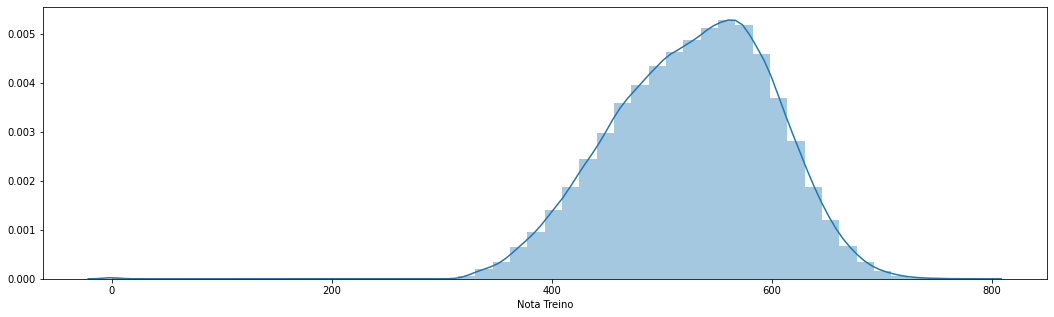

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))
plt.xlabel('Nota Treino')
sns.distplot(Y_treino, kde=True, hist=True)

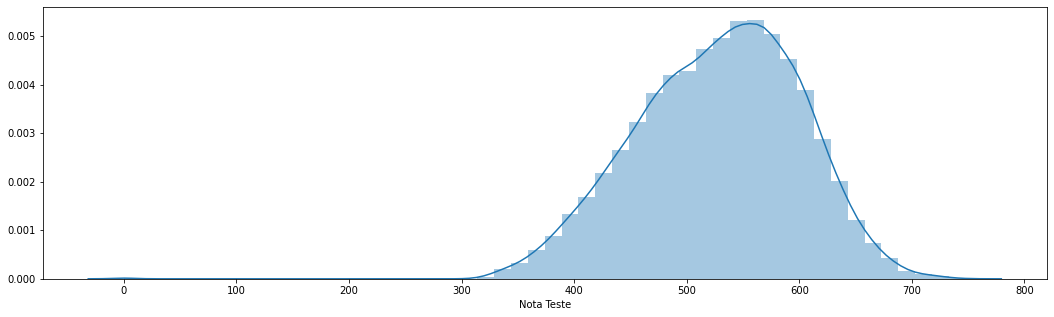

In [ ]:
plt.figure(figsize=(18,5))
plt.xlabel('Nota Teste')
sns.distplot(Y_teste, kde=True, hist=True)

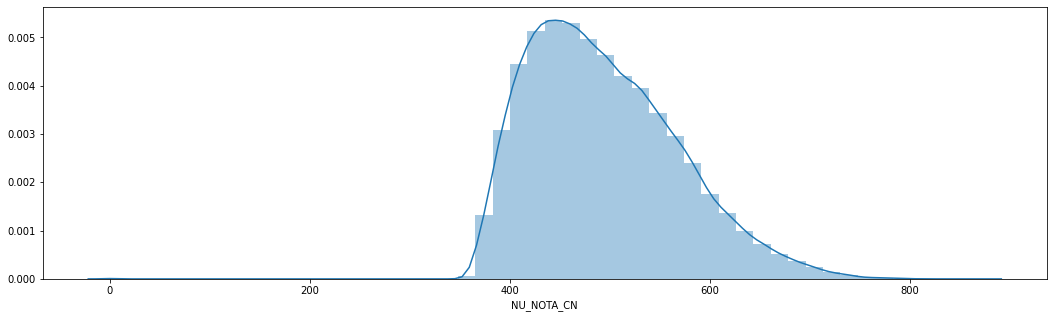

In [ ]:
plt.figure(figsize=(18,5))
plt.xlabel('NU_NOTA_CN')
sns.distplot(dados_treino.NU_NOTA_CN, kde=True, hist=True)

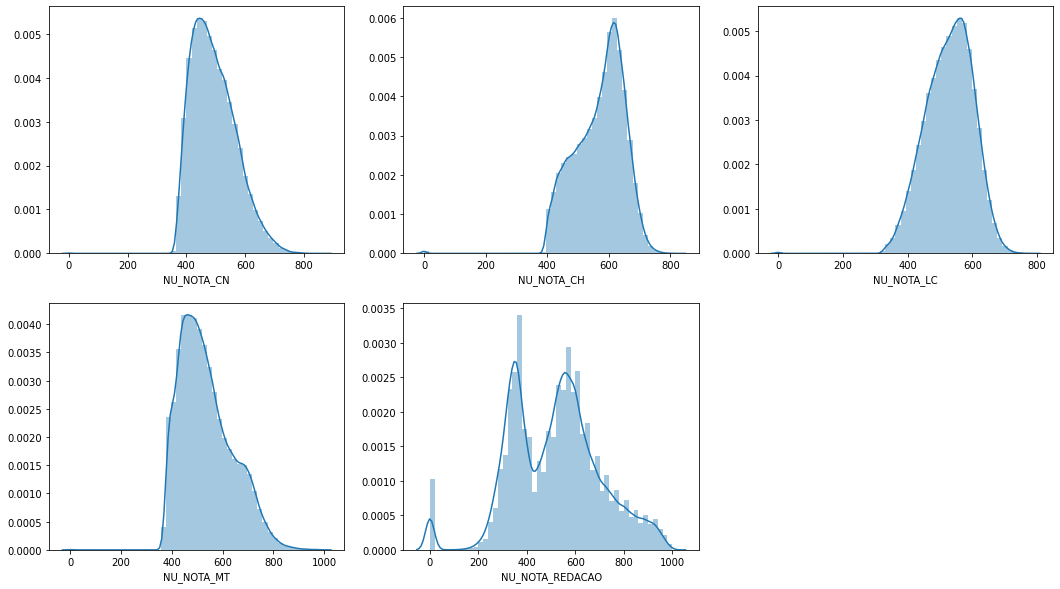

In [ ]:

plt.figure(figsize=(18,10))

for i,x in enumerate(dados_treino.columns, start=1):
  plt.subplot(2, 3,i)
  plt.xlabel(x)
  sns.distplot(dados_treino[x], kde=True, hist=True)

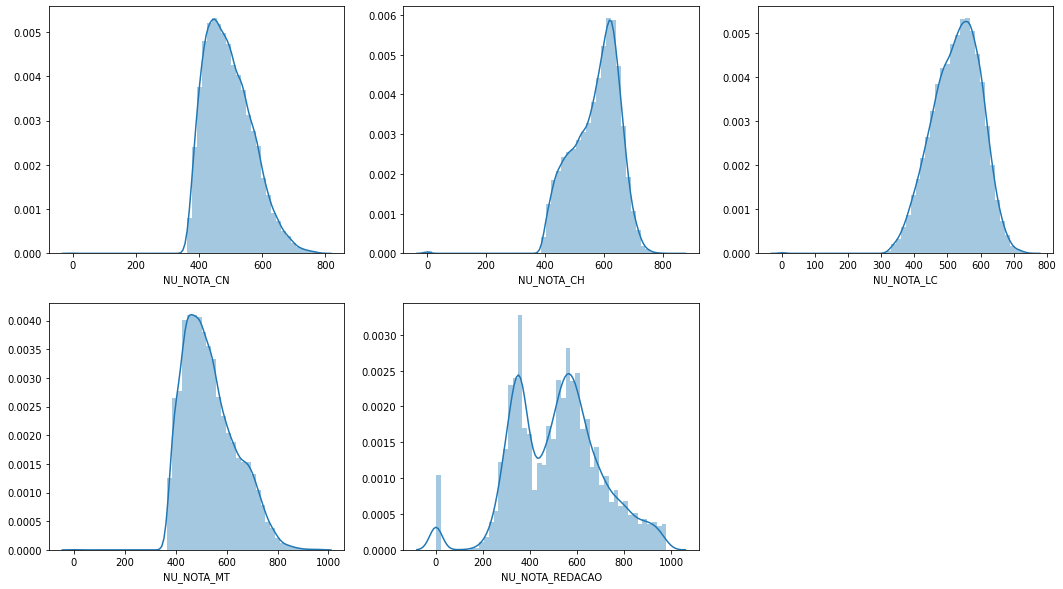

In [ ]:

plt.figure(figsize=(18,10))

for i,x in enumerate(dados_teste.columns, start=1):
  plt.subplot(2, 3,i)
  plt.xlabel(x)
  sns.distplot(dados_teste[x], kde=True, hist=True)

In [ ]:
dados_teste.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.566659,0.588818,0.574146,0.507388
NU_NOTA_CH,0.566659,1.000000,0.696624,0.522041,0.503655
NU_NOTA_LC,0.588818,0.696624,1.000000,0.560897,0.552145
NU_NOTA_MT,0.574146,0.522041,0.560897,1.000000,0.486406
NU_NOTA_REDACAO,0.507388,0.503655,0.552145,0.486406,1.000000


In [ ]:
dados_treino.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.568969,0.594625,0.580603,0.513613
NU_NOTA_CH,0.568969,1.000000,0.701125,0.531336,0.508316
NU_NOTA_LC,0.594625,0.701125,1.000000,0.567226,0.560623
NU_NOTA_MT,0.580603,0.531336,0.567226,1.000000,0.489896
NU_NOTA_REDACAO,0.513613,0.508316,0.560623,0.489896,1.000000


<Figure size 1296x720 with 0 Axes>

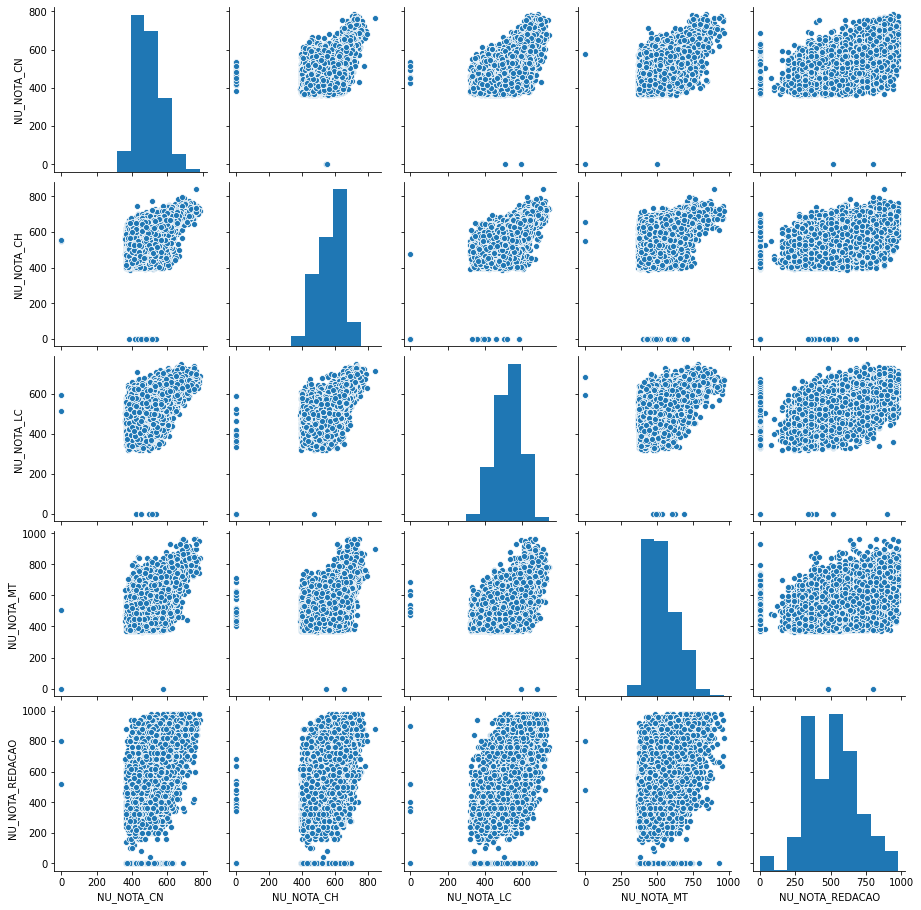

In [ ]:
plt.figure(figsize=(18,10))

sns.pairplot(dados_teste)

In [ ]:
!pip install xgboost

In [ ]:
seed = 42

In [ ]:
#from sklearn.linear_model import XGBRegressor
from xgboost import XGBRegressor

modelo5 = XGBRegressor(random_state=42, seed=42, learning_rate= 0.1, max_depth= 5, n_estimators= 170
                    , booster='gbtree', objective='reg:squarederror')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:


modelo5_score = cross_val_score(estimator= modelo5, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',modelo5_score)
print('\nmédia -->',modelo5_score.mean())
print('\ndesvio padrão -->',modelo5_score.std())

scores --> [-2010.16339233 -2057.48092504 -2077.32549123 -2003.76862957
 -2002.51678633 -1984.41339138 -2020.43335321 -1986.08796096
 -1995.37382207 -2063.55411675]

média --> -2020.1117868855094

desvio padrão --> 32.0574739266575


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=seed)

GBR_score = cross_val_score(estimator= GBR, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',GBR_score)
print('\nmédia -->',GBR_score.mean())
print('\ndesvio padrão -->',GBR_score.std())

scores --> [-2015.9977243  -2049.92963864 -2071.74331072 -2001.57972226
 -1994.42480573 -1989.3791677  -2014.7635591  -1992.38679183
 -1992.06947012 -2044.26796977]

média --> -2016.6542160166798

desvio padrão --> 27.508580443571717


In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR =  DecisionTreeRegressor(random_state=seed, max_depth=20, min_samples_leaf=10, min_samples_split=5)


DTR_score = cross_val_score(estimator= DTR, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',DTR_score)
print('\nmédia -->',DTR_score.mean())
print('\ndesvio padrão -->',DTR_score.std())

scores --> [-2467.18548002 -2596.86614225 -2553.09991212 -2494.354723
 -2487.86583969 -2470.59712505 -2481.24193788 -2505.52821489
 -2491.64141897 -2589.42824669]

média --> -2513.780904055838

desvio padrão --> 45.68768874397382


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=seed, n_estimators=100, criterion='mse',max_depth=20,min_samples_leaf=5)


RFR_score = cross_val_score(estimator=RFR, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',RFR_score)
print('\nmédia -->',RFR_score.mean())
print('\ndesvio padrão -->',RFR_score.std())

scores --> [-2083.69433347 -2137.00319778 -2142.36760626 -2059.10794291
 -2071.28241155 -2054.13519014 -2081.01513045 -2056.98925989
 -2053.66934375 -2146.51658405]

média --> -2088.578100024359

desvio padrão --> 36.39593358588819


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = {
              'criterion': ['friedman_mse', 'mse']
              ,'n_estimators': [50, 100]
              ,'learning_rate' : [0.1]
              #,'min_samples_split': [5,10]
             }


gbr_grid = GridSearchCV(estimator=GBR,
                     param_grid=grid_param,
                     scoring='neg_mean_squared_error',
                     cv=5)

gbr_grid.fit(X_treino, Y_treino)

print('melhor parametro -->',gbr_grid.best_params_)
print('melhor score -->',gbr_grid.best_score_)

melhor parametro --> {'criterion': 'mse', 'learning_rate': 0.1, 'n_estimators': 100}
melhor score --> -2018.3657089525545


In [ ]:
from sklearn.linear_model import ElasticNetCV

EN = ElasticNetCV(max_iter=1e7)


EN_score = cross_val_score(estimator=EN, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',EN_score)
print('\nmédia -->',EN_score.mean())
print('\ndesvio padrão -->',EN_score.std())

scores --> [-2140.75679505 -2175.09993453 -2209.79055149 -2143.54370175
 -2126.16019894 -2114.071131   -2139.48513569 -2118.94608492
 -2121.63691159 -2166.45028709]

média --> -2145.594073204562

desvio padrão --> 28.54316023424961


In [ ]:
 from sklearn.ensemble import BaggingRegressor

BR = BaggingRegressor(random_state=seed, bootstrap=True, n_estimators=2)

BR_score = cross_val_score(estimator=BR, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',BR_score)
print('\nmédia -->',BR_score.mean())
print('\ndesvio padrão -->',BR_score.std())

scores --> [-3199.13138983 -3258.10298233 -3202.93899283 -3126.801973
 -3148.35542967 -3147.8680955  -3190.26478867 -3129.02637267
 -3137.93912933 -3223.72000067]

média --> -3176.41491545

desvio padrão --> 42.558025178229954


In [ ]:
   from sklearn.linear_model import Lasso

LASSO = Lasso()

LASSO_score = cross_val_score(estimator=LASSO, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',LASSO_score)
print('\nmédia -->',LASSO_score.mean())
print('\ndesvio padrão -->',LASSO_score.std())

scores --> [-2140.57413233 -2175.03621451 -2209.84523942 -2143.53634336
 -2126.08961223 -2114.16233108 -2139.386417   -2118.95559492
 -2121.79865506 -2166.34333427]

média --> -2145.5727874181

desvio padrão --> 28.52675457177632


In [ ]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet()

EN_score = cross_val_score(estimator=EN, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',EN_score)
print('\nmédia -->',EN_score.mean())
print('\ndesvio padrão -->',EN_score.std())

scores --> [-2140.57016576 -2175.03151859 -2209.84825146 -2143.53792804
 -2126.08555825 -2114.16716144 -2139.38885804 -2118.95728005
 -2121.80067012 -2166.33908973]

média --> -2145.5726481484403

desvio padrão --> 28.526064444722856


In [ ]:
from sklearn.linear_model import RANSACRegressor

RANSACREGRESSOR = RANSACRegressor()

RANSACREGRESSOR_score = cross_val_score(estimator=RANSACREGRESSOR, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',RANSACREGRESSOR_score)
print('\nmédia -->',RANSACREGRESSOR_score.mean())
print('\ndesvio padrão -->',RANSACREGRESSOR_score.std())

scores --> [-2642.96704791 -2449.42131282 -2857.35121559 -2462.21311978
 -2799.18493918 -2554.71334018 -2300.62697349 -2553.41008743
 -2404.48393523 -2553.08644882]

média --> -2557.745842043354

desvio padrão --> 163.04251147940218


In [ ]:
from sklearn.linear_model import Ridge

Ridge_reg = Ridge()

Ridge_reg_score = cross_val_score(estimator=Ridge_reg, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',Ridge_reg_score)
print('\nmédia -->',Ridge_reg_score.mean())
print('\ndesvio padrão -->',Ridge_reg_score.std())

scores --> [-2140.56104198 -2175.02967318 -2209.85270039 -2143.54114694
 -2126.08279319 -2114.17358392 -2139.38085641 -2118.95840422
 -2121.81261938 -2166.33284724]

média --> -2145.5725666829308

desvio padrão --> 28.525114218461066


In [ ]:
from sklearn.svm import SVR

SVR_reg = SVR(kernel='linear')

SVR_reg_score = cross_val_score(estimator=SVR_reg, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',SVR_reg_score)
print('\nmédia -->',SVR_reg_score.mean())
print('\ndesvio padrão -->',SVR_reg_score.std())

In [ ]:
from sklearn.svm import SVR

SVR_rbf = SVR(kernel='rbf')

SVR_rbf_score = cross_val_score(estimator=SVR_rbf, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',SVR_rbf_score)
print('\nmédia -->',SVR_rbf_score.mean())
print('\ndesvio padrão -->',SVR_rbf_score.std())

In [ ]:
from sklearn.linear_model import SGDRegressor

SGDR = SGDRegressor()

SGDR_score = cross_val_score(estimator=SGDR, X=X_treino, y=Y_treino, cv=10, scoring='neg_mean_squared_error')

print('scores -->',SGDR_score)
print('\nmédia -->',SGDR_score.mean())
print('\ndesvio padrão -->',SGDR_score.std())

scores --> [-1.48239496e+27 -5.87338978e+27 -8.06510604e+27 -1.91735980e+27
 -1.43862973e+27 -3.12807044e+26 -7.71376382e+27 -5.82448279e+26
 -2.19014851e+26 -1.56972214e+26]

média --> -2.7761886524897965e+27

desvio padrão --> 3.0070863279940886e+27
